In [ ]:
# =================  Chronic Kidney Disease Prediction ==========
# Classification Assignment
# Ref URL: https://www.kaggle.com/code/parash11/kidney-disease-prediction-accuracy-98-6-3
# https://www.kaggle.com/code/hasantugra/kidney-disease-classification # This is not used in this file

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB 660.6 kB/s eta 0:00:23
   ---------------------------------------- 0.1/14.8 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.3/14.8 MB 2.7 MB/s eta 0:00:06
   - -------------------------------------- 0.7/14.8 MB 4.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/14.8 MB 5.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/14.8 MB 6.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.8 MB 6.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/14.8 MB 7.0 MB/s eta 0:00:02
   -------- ------------------------------- 3.0/14.8 MB 7.3 MB/s eta 0:00:02
   --------- ------------------------------ 3.4/14.8 MB 7.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.9/14.8 MB 7.8 MB/s eta 0:00:02
   


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
plt.style.use('fivethirtyeight')
%matplotlib inline



In [4]:
df = pd.read_csv("CKD.csv")

In [5]:
df.shape

(399, 25)

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [7]:
# rename columns to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cell',
              'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
              'sodium', 'potassium', 'haemoglobin', 'packed_cell_volumn', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']

In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volumn,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [9]:
df.describe()

,age,blood_pressure,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volumn,white_blood_cell_count,red_blood_cell_count
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.492308,76.459948,0.899749,0.395990,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
std,16.995379,13.492053,1.314769,1.041155,74.864224,49.336046,5.623758,9.215829,2.823323,2.715753,8.157274,2526.204544,0.841006
min,2.000000,50.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,4.500000
50%,54.000000,76.459948,0.000000,0.000000,127.000000,44.000000,1.400000,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
75%,64.000000,80.000000,2.000000,0.000000,150.000000,62.500000,3.077356,141.000000,4.800000,14.600000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      399 non-null    float64
 1   blood_pressure           399 non-null    float64
 2   specific_gravity         399 non-null    object 
 3   albumin                  399 non-null    float64
 4   sugar                    399 non-null    float64
 5   red_blood_cell           399 non-null    object 
 6   pus_cell                 399 non-null    object 
 7   pus_cell_clumps          399 non-null    object 
 8   bacteria                 399 non-null    object 
 9   blood_glucose_random     399 non-null    float64
 10  blood_urea               399 non-null    float64
 11  serum_creatinine         399 non-null    float64
 12  sodium                   399 non-null    float64
 13  potassium                399 non-null    float64
 14  haemoglobin              3

In [25]:
# converting necessary columns to numerical type
'''

df['packed_cell_volumn'] = pd.to_numeric(df['packed_cell_volumn'], errors='coerce')
df['white_blood_cell_count']   = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']     = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

'''


"\n\ndf['packed_cell_volumn'] = pd.to_numeric(df['packed_cell_volumn'], errors='coerce')\ndf['white_blood_cell_count']   = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')\ndf['red_blood_cell_count']     = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')\n\n"

In [11]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype == 'float64']

In [12]:
cat_cols

['specific_gravity',
 'red_blood_cell',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [13]:
df.specific_gravity.value_counts()
df.diabetes_mellitus.value_counts()
df.coronary_artery_disease.value_counts()
df['class'].value_counts()



class
yes    249
no     150
Name: count, dtype: int64

In [14]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

specific_gravity has ['c' 'a' 'd' 'b' 'e'] values 

red_blood_cell has ['normal' 'abnormal'] values 

pus_cell has ['abnormal' 'normal'] values 

pus_cell_clumps has ['notpresent' 'present'] values 

bacteria has ['notpresent' 'present'] values 

hypertension has ['no' 'yes'] values 

diabetes_mellitus has ['no' 'yes'] values 

coronary_artery_disease has ['no' 'yes'] values 

appetite has ['yes' 'poor'] values 

peda_edema has ['yes' 'poor'] values 

aanemia has ['no' 'yes'] values 

class has ['yes' 'no'] values 



C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\733200234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\733200234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\7

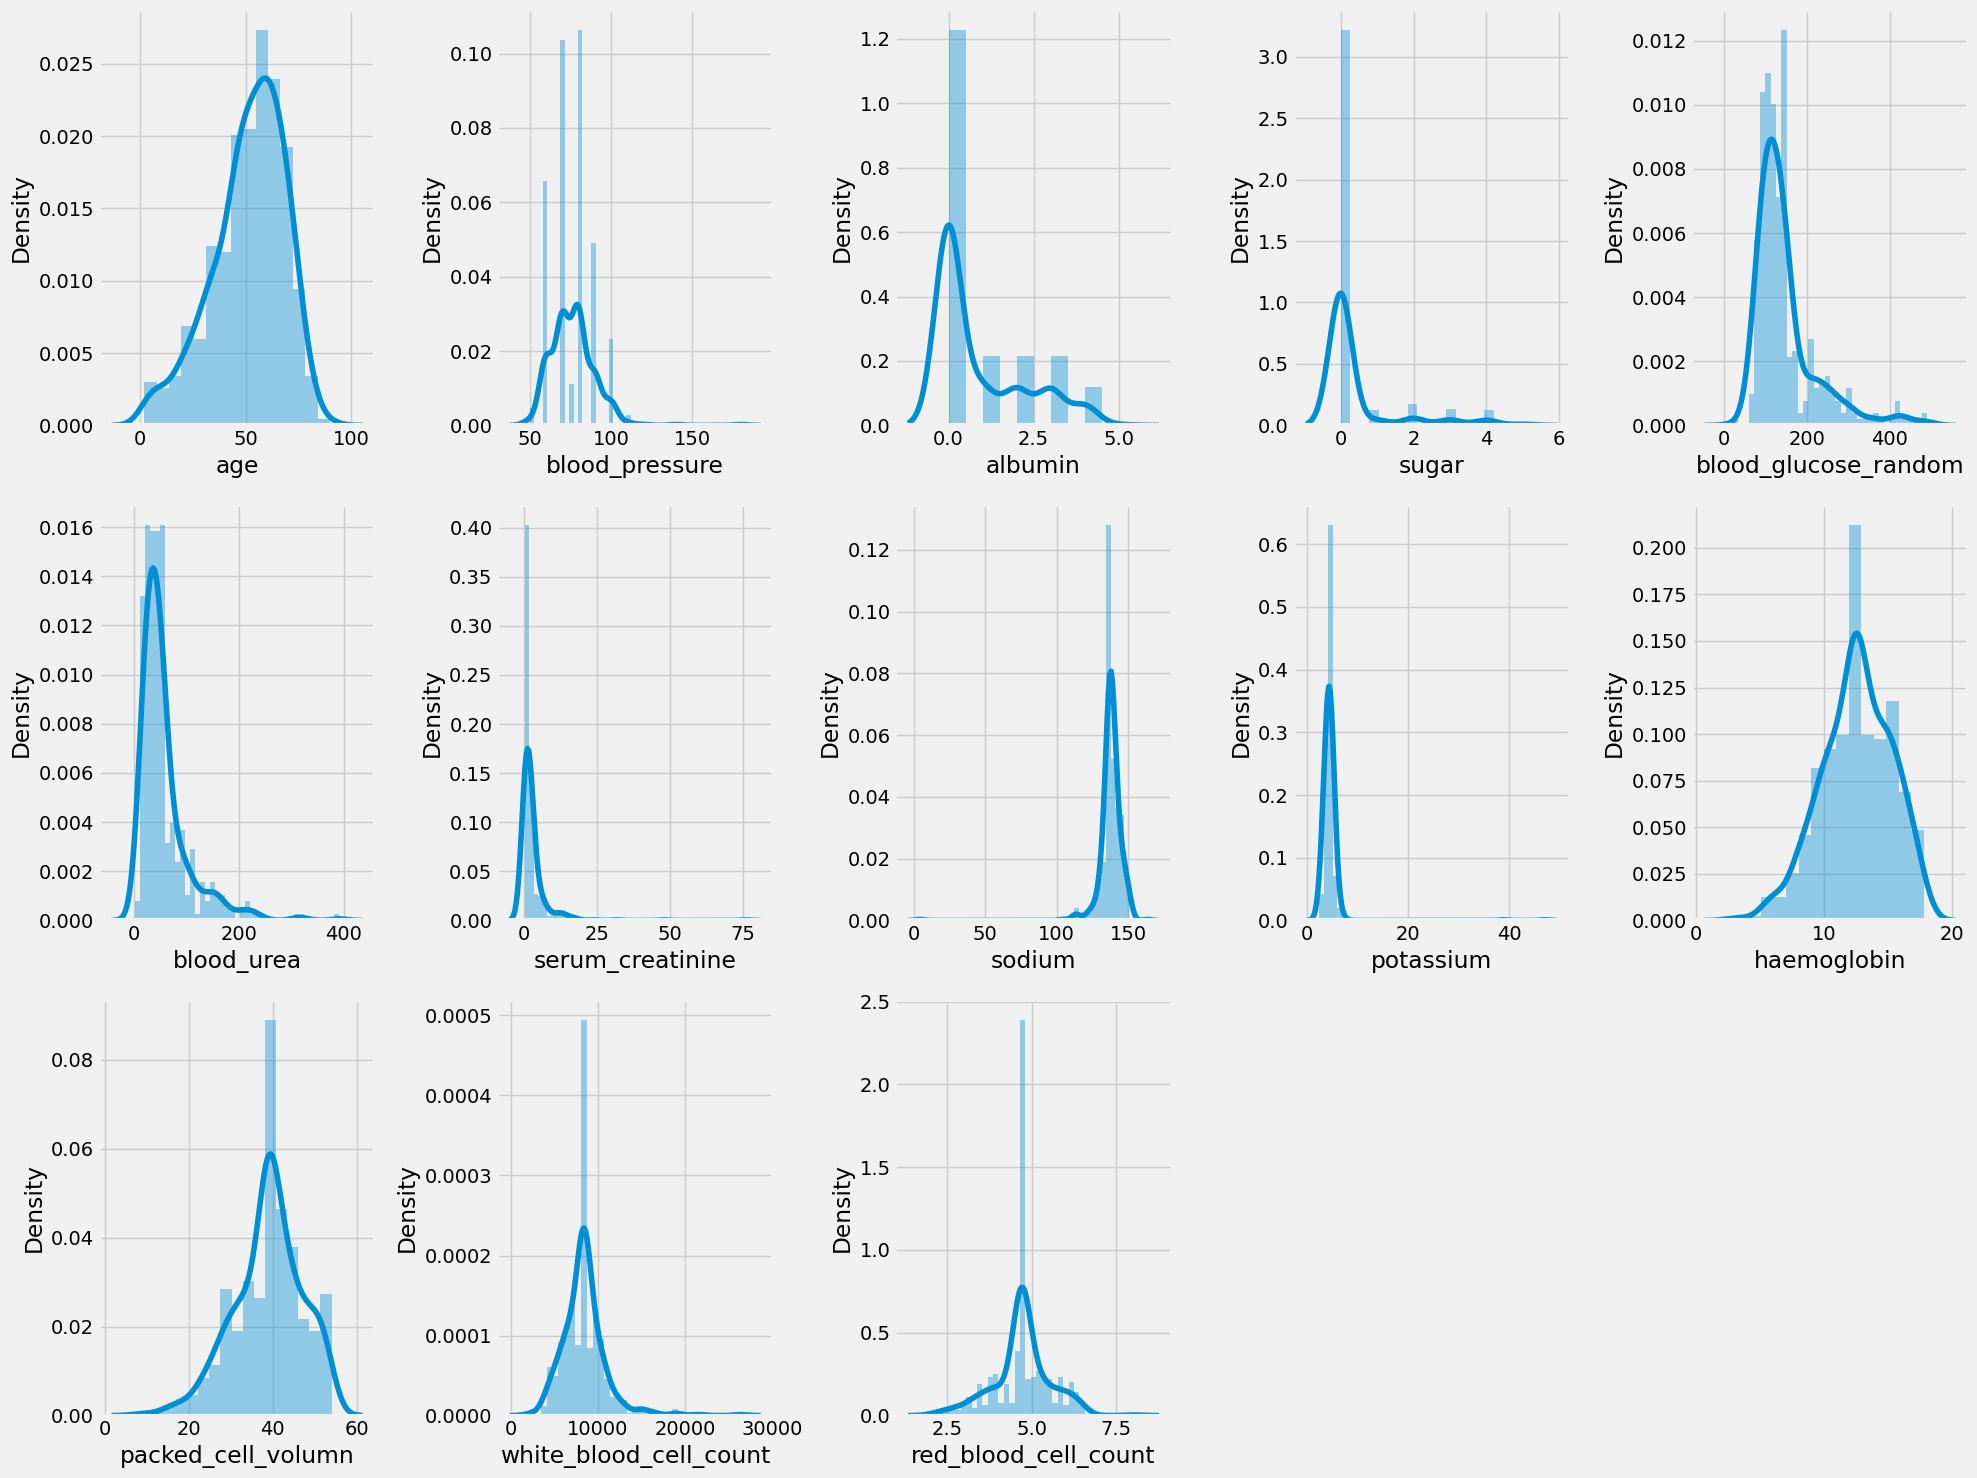

In [15]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# replace incorrect values
''' df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df['coronary_artery_disease'] =  df['coronary_artery_disease'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df['class'] = df['class'].replace(to_replace={'yes\t': 'yes', 'no\t': 'no'})

'''

C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\4082031622.py:9: FutureWarning: 

Passing `palette` without 

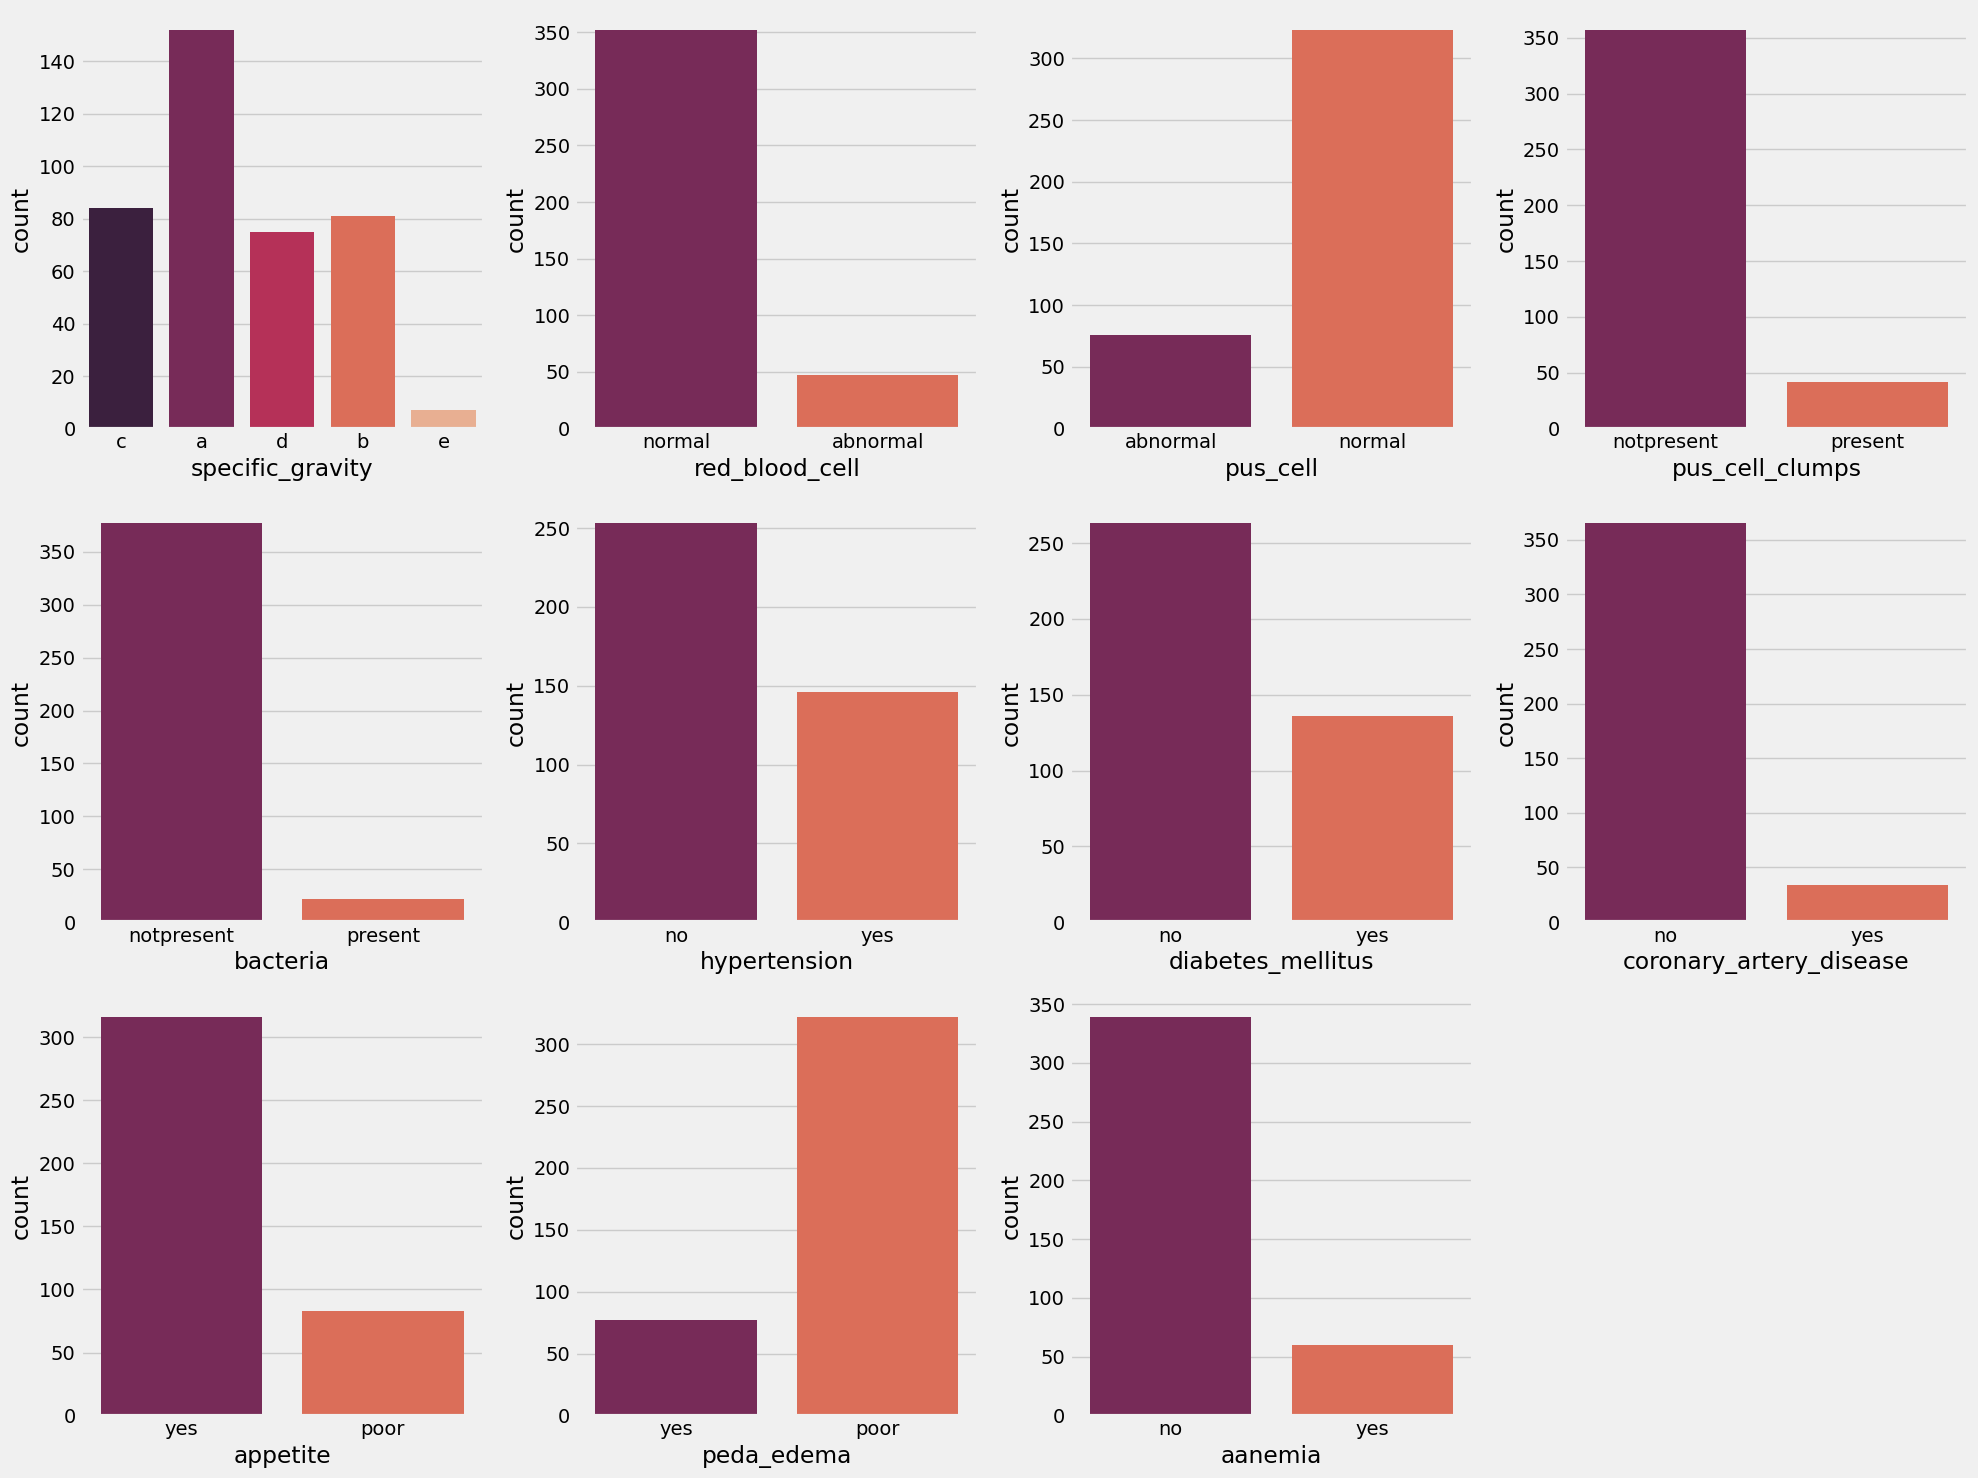

In [16]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()    

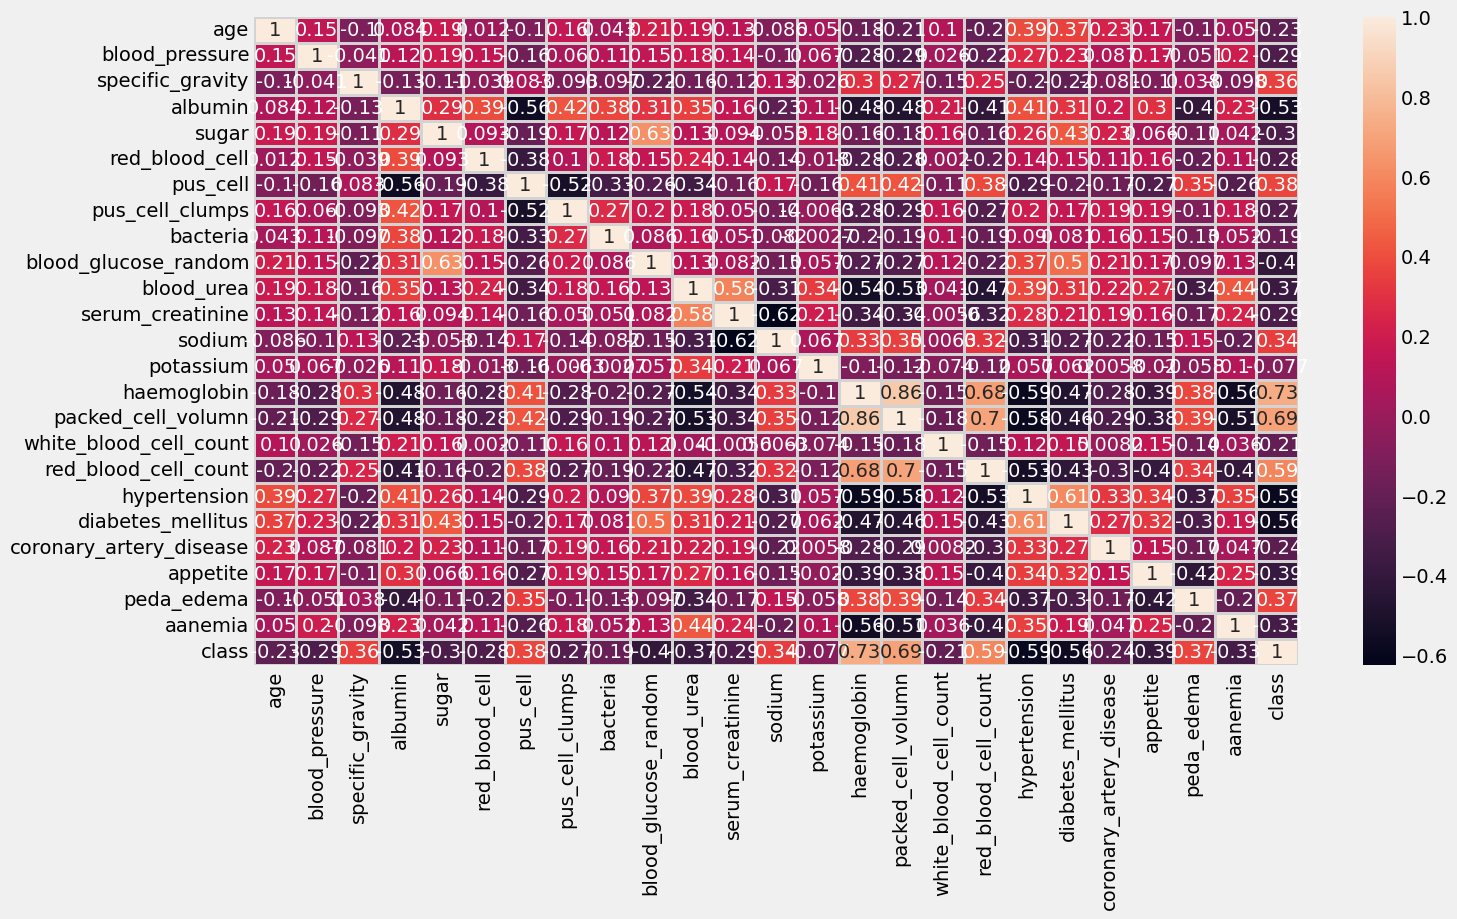

In [17]:
# heatmap of data

plt.figure(figsize = (15, 8))

# Convert categorical columns to numerical using pd.factorize before calculating correlation
numeric_df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)


sns.heatmap(numeric_df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


In [18]:
# checking for null values

df.isna().sum().sort_values(ascending = False)


age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volumn         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cell             0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [19]:
df['class'].value_counts()

class
yes    249
no     150
Name: count, dtype: int64

In [20]:
df[num_cols].isnull().sum()


age                       0
blood_pressure            0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volumn        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
df[cat_cols].isnull().sum()


specific_gravity           0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

specific_gravity has 5 categories

red_blood_cell has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [24]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volumn,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,2.0,76.459948,2,3.0,0.0,1,0,0,0,148.112676,...,38.868902,8408.191126,4.705597,0,0,0,1,1,0,1
1,3.0,76.459948,2,2.0,0.0,1,1,0,0,148.112676,...,34.000000,12300.000000,4.705597,0,0,0,1,0,0,1
2,4.0,76.459948,0,1.0,0.0,1,1,0,0,99.000000,...,34.000000,8408.191126,4.705597,0,0,0,1,0,0,1
3,5.0,76.459948,3,1.0,0.0,1,1,0,0,148.112676,...,38.868902,8408.191126,4.705597,0,0,0,1,0,1,1
4,5.0,50.000000,2,0.0,0.0,1,1,0,0,148.112676,...,36.000000,12400.000000,4.705597,0,0,0,1,0,0,1


In [25]:
X = df.drop('class', axis = 1)
y = df['class']


In [26]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
# ================= KNN ==============
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f"Training Accuracy of KNN is {accuracy_score(y_test, y_pred)} \n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred) } \n " )
print(f"Classification Report :- \n {classification_report(y_test, y_pred) } \n " )


Training Accuracy of KNN is 0.75 

Confusion Matrix :- 
 [[41  4]
 [26 49]] 
 
Classification Report :- 
               precision    recall  f1-score   support

           0       0.61      0.91      0.73        45
           1       0.92      0.65      0.77        75

    accuracy                           0.75       120
   macro avg       0.77      0.78      0.75       120
weighted avg       0.81      0.75      0.75       120
 
 


In [29]:
# ================= Decision Tree Classifier ==============
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_test, y_pred)} \n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred) } \n " )
print(f"Classification Report :- \n {classification_report(y_test, y_pred) } \n " )

Training Accuracy of Decision Tree Classifier is 0.925 

Confusion Matrix :- 
 [[44  1]
 [ 8 67]] 
 
Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.99      0.89      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120
 
 


In [47]:
# ================= Decision Tree Classifier ==============
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_test, y_pred)} \n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred) } \n " )
print(f"Classification Report :- \n {classification_report(y_test, y_pred) } \n " )

Training Accuracy of Decision Tree Classifier is 0.925 

Confusion Matrix :- 
 [[44  1]
 [ 8 67]] 
 
Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.99      0.89      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120
 
 


In [48]:
# hyper parameter tuning of decision tree
# Ref URL: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],

    'max_features' : ['sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dt_classifier, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.9748701298701299


In [40]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[44  1]
 [ 1 74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.99      0.99      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [41]:
# ============= Random Forest Classifier ===========
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[44  1]
 [ 0 75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.99      1.00      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[44  1]
 [ 3 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")


Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 1.0 

Confusion Matrix :- 
[[45  0]
 [ 0 75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [44]:
# ===== Stochastic Gradient Boosting (SGB) ====

sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")


Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 1.0 

Confusion Matrix :- 
[[45  0]
 [ 0 75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [45]:
# ========== XgBoost =================
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")


Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[44  1]
 [ 1 74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.99      0.99      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [46]:
# ================= LGBM Classifier ==========

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))


[LightGBM] [Info] Number of positive: 174, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 491
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623656 -> initscore=0.505095
[LightGBM] [Info] Start training from score 0.505095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [50]:
# ======== model comparison ========

models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Gradient Boosting Classifier,1.000000
5,Stochastic Gradient Boosting,1.000000
2,Random Forest Classifier,0.991667
1,Decision Tree Classifier,0.983333
6,XgBoost,0.983333
3,Ada Boost Classifier,0.966667
0,KNN,0.925000


In [54]:
import plotly.express as px

# Sort the DataFrame by 'Score' in descending order
models_sorted = models.sort_values(by='Score', ascending=True)

# Create the bar plot
fig = px.bar(
    data_frame=models_sorted,
    x='Score',
    y='Model',
    color='Score',
    template='plotly_dark',
    title='Models Comparison',
    orientation='h'  # Make it horizontal for better readability
)

fig.show()